In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Amazon Sale Report.csv")

In [3]:
df.shape

(128976, 21)

In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


### Dropped unnecessary Columns

In [7]:
df.drop(['New','PendingS','index'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

### Counting Null Values

In [9]:
pd.isnull(df).sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [10]:
df['Amount'] = df['Amount'].fillna(0)
df['currency']=df['currency'].fillna('INR')
df['Amount'] = df['Amount'].astype('double')

In [11]:
pd.isnull(df).sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

###  UNIQUELY naming redundunt state names

In [12]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [13]:
filt= (df['ship-state'] == 'RJ')
df.loc[filt,'ship-state']='RAJASTHAN'

filt= (df['ship-state'] == 'Rajsthan')
df.loc[filt,'ship-state']='RAJASTHAN'

filt= (df['ship-state'] == 'Rajshthan')
df.loc[filt,'ship-state']='RAJASTHAN'

filt= (df['ship-state'] == 'Rajasthan')
df.loc[filt,'ship-state']='RAJASTHAN'

filt= (df['ship-state'] == 'rajsthan')
df.loc[filt,'ship-state']='RAJASTHAN'

filt= (df['ship-state'] == 'rajasthan')
df.loc[filt,'ship-state']='RAJASTHAN'

filt= (df['ship-state'] == 'punjab')
df.loc[filt,'ship-state']='PUNJAB'

filt= (df['ship-state'] == 'Punjab')
df.loc[filt,'ship-state']='PUNJAB'

filt= (df['ship-state'] == 'PB')
df.loc[filt,'ship-state']='PUNJAB'

filt= (df['ship-state'] == 'Punjab/Mohali/Zirakpur')
df.loc[filt,'ship-state']='PUNJAB'

filt= (df['ship-state'] == 'Meghalaya')
df.loc[filt,'ship-state']='MEGHALAYA'

filt= (df['ship-state'] == 'Orissa')
df.loc[filt,'ship-state']='ODISHA'

filt= (df['ship-state'] == 'Odisha')
df.loc[filt,'ship-state']='ODISHA'

filt= (df['ship-state'] == 'orissa')
df.loc[filt,'ship-state']='ODISHA'

filt= (df['ship-state'] == 'Mizoram')
df.loc[filt,'ship-state']='MIZORAM'

filt= (df['ship-state'] == 'bihar')
df.loc[filt,'ship-state']='BIHAR'

filt= (df['ship-state'] == 'Bihar')
df.loc[filt,'ship-state']='BIHAR'

filt= (df['ship-state'] == 'Goa')
df.loc[filt,'ship-state']='GOA'

filt= (df['ship-state'] == 'goa')
df.loc[filt,'ship-state']='GOA'

filt= (df['ship-state'] == 'Nagaland')
df.loc[filt,'ship-state']='NAGALAND'

filt= (df['ship-state'] == 'NL')
df.loc[filt,'ship-state']='NAGALAND'

filt= (df['ship-state'] == 'Arunachal pradesh')
df.loc[filt,'ship-state']='ARUNACHAL PRADESH'

filt= (df['ship-state'] == 'Arunachal Pradesh')
df.loc[filt,'ship-state']='ARUNACHAL PRADESH'

filt= (df['ship-state'] == 'AR')
df.loc[filt,'ship-state']='ARUNACHAL PRADESH'

filt= (df['ship-state'] == 'Delhi')
df.loc[filt,'ship-state']='DELHI'

filt= (df['ship-state'] == 'New Delhi')
df.loc[filt,'ship-state']='DELHI'

filt= (df['ship-state'] == 'delhi')
df.loc[filt,'ship-state']='DELHI'

filt= (df['ship-state'] == 'Sikkim')
df.loc[filt,'ship-state']='SIKKIM'

filt= (df['ship-state'] == 'ANDRA PRADESH')
df.loc[filt,'ship-state']='ANDHRA PRADESH'

filt= (df['ship-state'] == 'APO')
df.loc[filt,'ship-state']='ANDHRA PRADESH'

filt= (df['ship-state'] == 'Gujarat')
df.loc[filt,'ship-state']='GUJARAT'

filt= (df['ship-state'] == 'Pondicherry')
df.loc[filt,'ship-state']='Puducherry'

filt= (df['ship-state'] == 'Puducherry')
df.loc[filt,'ship-state']='PUDUCHERRY'

filt= (df['ship-state'] == 'Chandigarh')
df.loc[filt,'ship-state']='CHANDIGARH'

filt= (df['ship-state'] == 'Manipur')
df.loc[filt,'ship-state']='MANIPUR'

df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'MIZORAM', 'LAKSHADWEEP'], dtype=object)

### Discribing Given Data 


In [14]:
df.describe()

,Qty,Amount,ship-postal-code
count,128976.000000,128976.000000,128941.000000
mean,0.904401,609.339491,463945.677744
std,0.313368,313.342529,191458.488954
min,0.000000,0.000000,110001.000000
25%,1.000000,413.000000,382421.000000
50%,1.000000,583.000000,500033.000000
75%,1.000000,771.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [15]:
df.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,128976,128941,128941,128941,39263
unique,120229,91,13,2,2,2,9,11,4,1,8948,36,1,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,2085,77815,89713,128852,88630,50292,22373,109486,128976,11208,22272,128941,39263


# Understanding sales and Patterns in Data

#

#### Converting 'Date' column to datetime format

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

#### Aggregate total sales and number of orders by date

In [17]:
sales_overview = df.groupby('Date').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()
sales_overview.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)

#### Plotting total sales and number of orders

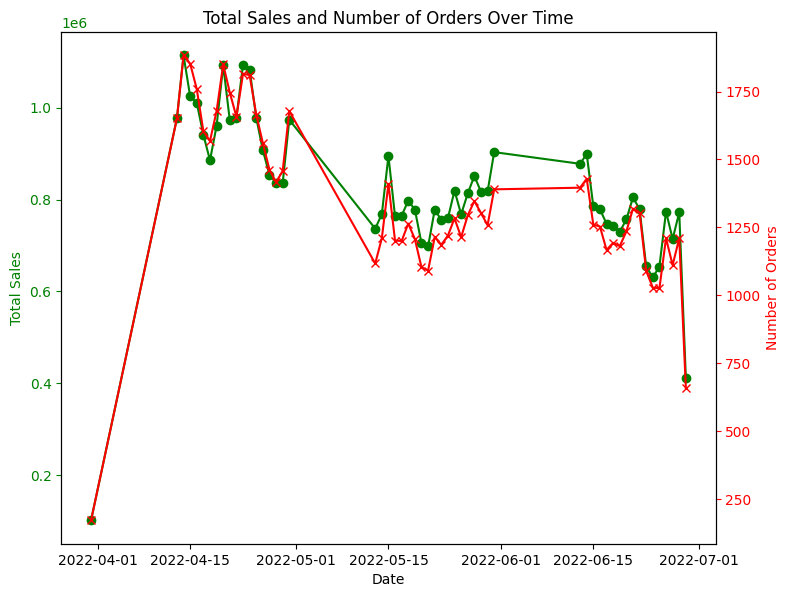

In [18]:
fig, ax1 = plt.subplots(figsize=(8,6))


ax1.plot(sales_overview['Date'], sales_overview['Amount'], color='g', marker='o', label='Total Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
ax2.plot(sales_overview['Date'], sales_overview['Number of Orders'], color='r', marker='x', label='Number of Orders')
ax2.set_ylabel('Number of Orders', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Total Sales and Number of Orders Over Time')
plt.show()

#

#### Plotting distribution of product categories

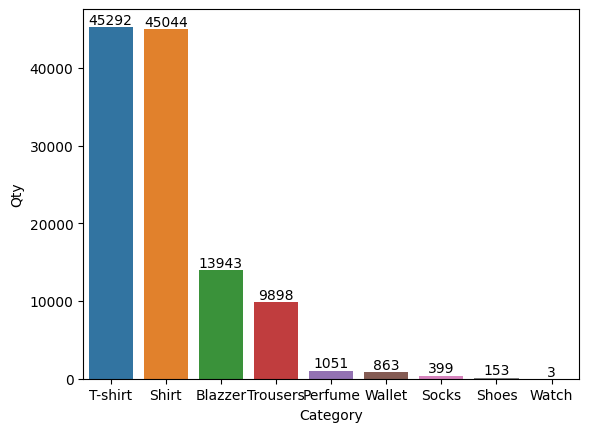

In [19]:
Category_qty=df.groupby(['Category'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

a=sns.barplot(x='Category',y='Qty',data=Category_qty)

for bars in a.containers:
    a.bar_label(bars)

In [20]:
df.groupby(['Category'],as_index=False)['Qty'].sum().sort_values(by='Qty')

,Category,Qty
8,Watch,3
3,Shoes,153
4,Socks,399
7,Wallet,863
1,Perfume,1051
6,Trousers,9898
0,Blazzer,13943
2,Shirt,45044
5,T-shirt,45292


FROM ABOVE DATA WE CAN SEE THAT AMAZON WAS USED TO ORDER T-SHIRTS THE MOST FOLLOWED BY SHIRTS, BLAZERS, TROUSERS AND SO ON

#

#### Plotting distribution of product Sizes

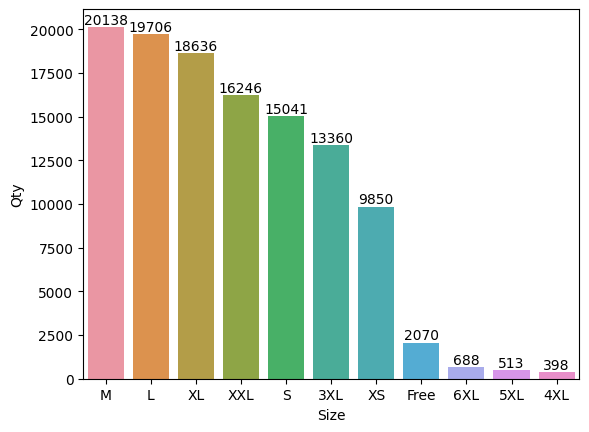

In [21]:
Size_qty=df.groupby(['Size'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

b=sns.barplot(x='Size',y='Qty',data=Size_qty)

for bars in b.containers:
    b.bar_label(bars)

In [22]:
df.groupby(['Size'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,20138
5,L,19706
8,XL,18636
10,XXL,16246
7,S,15041
0,3XL,13360
9,XS,9850
4,Free,2070
3,6XL,688
2,5XL,513


FROM ABOVE DATA WE CAN SEE THAT M CLOTH SIZE WAS ORDERED THE MOST FOLLOWED BY L, XL, XXL..... AND 4XL WAS ORDERED THE LEAST

#

#### Discription and Effectiveness of the fulfillment methods

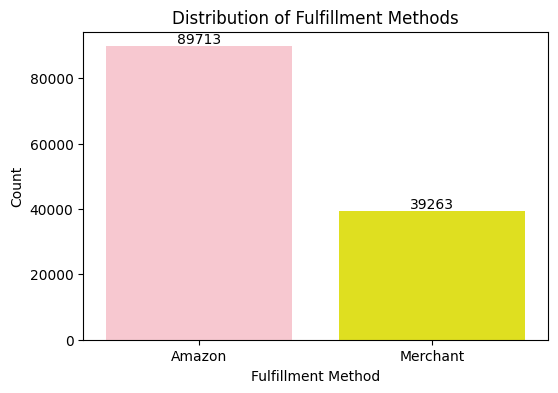

In [23]:
color_palette = ['pink', 'yellow']
plt.figure(figsize=(6, 4))
c=sns.countplot(data=df, x='Fulfilment', order=df['Fulfilment'].value_counts().index, palette=color_palette)
for bars in c.containers:
    c.bar_label(bars)


plt.title('Distribution of Fulfillment Methods')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')

plt.show()

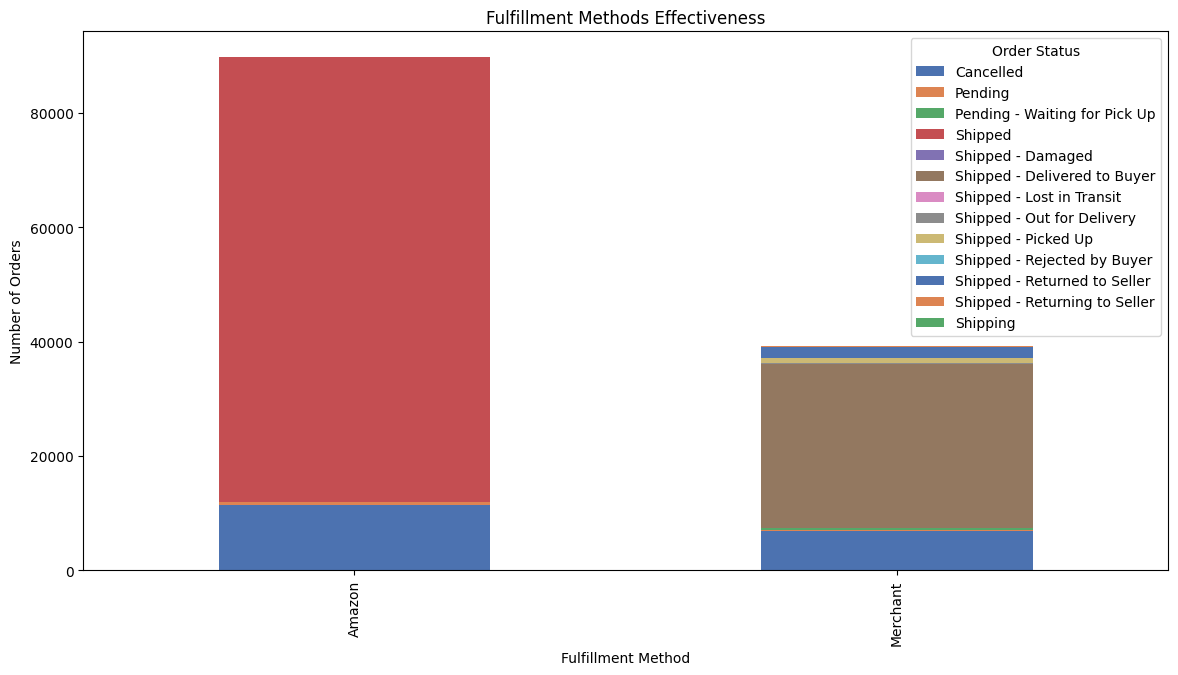

In [24]:
custom_palette = sns.color_palette("deep")

fulfillment_effectiveness = df.groupby(['Fulfilment', 'Status']).size().unstack().fillna(0)
fulfillment_effectiveness.plot(kind='bar', stacked=True, figsize=(14, 7), color=custom_palette)

plt.title('Fulfillment Methods Effectiveness')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.legend(title='Order Status')
plt.show()

The above 2 graphs show the discription and effectiveness of the fulfillment methods

#

#### Checking B2B data by using pie chart

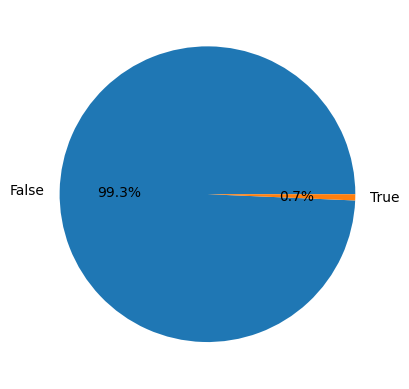

In [25]:
# checking B2B data by using pie chart
B2B_Check=df['B2B'].value_counts()
# Plot the pie chart based on true and False(index)
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
plt.show()

#

#### Showing Number of Customers From Different States

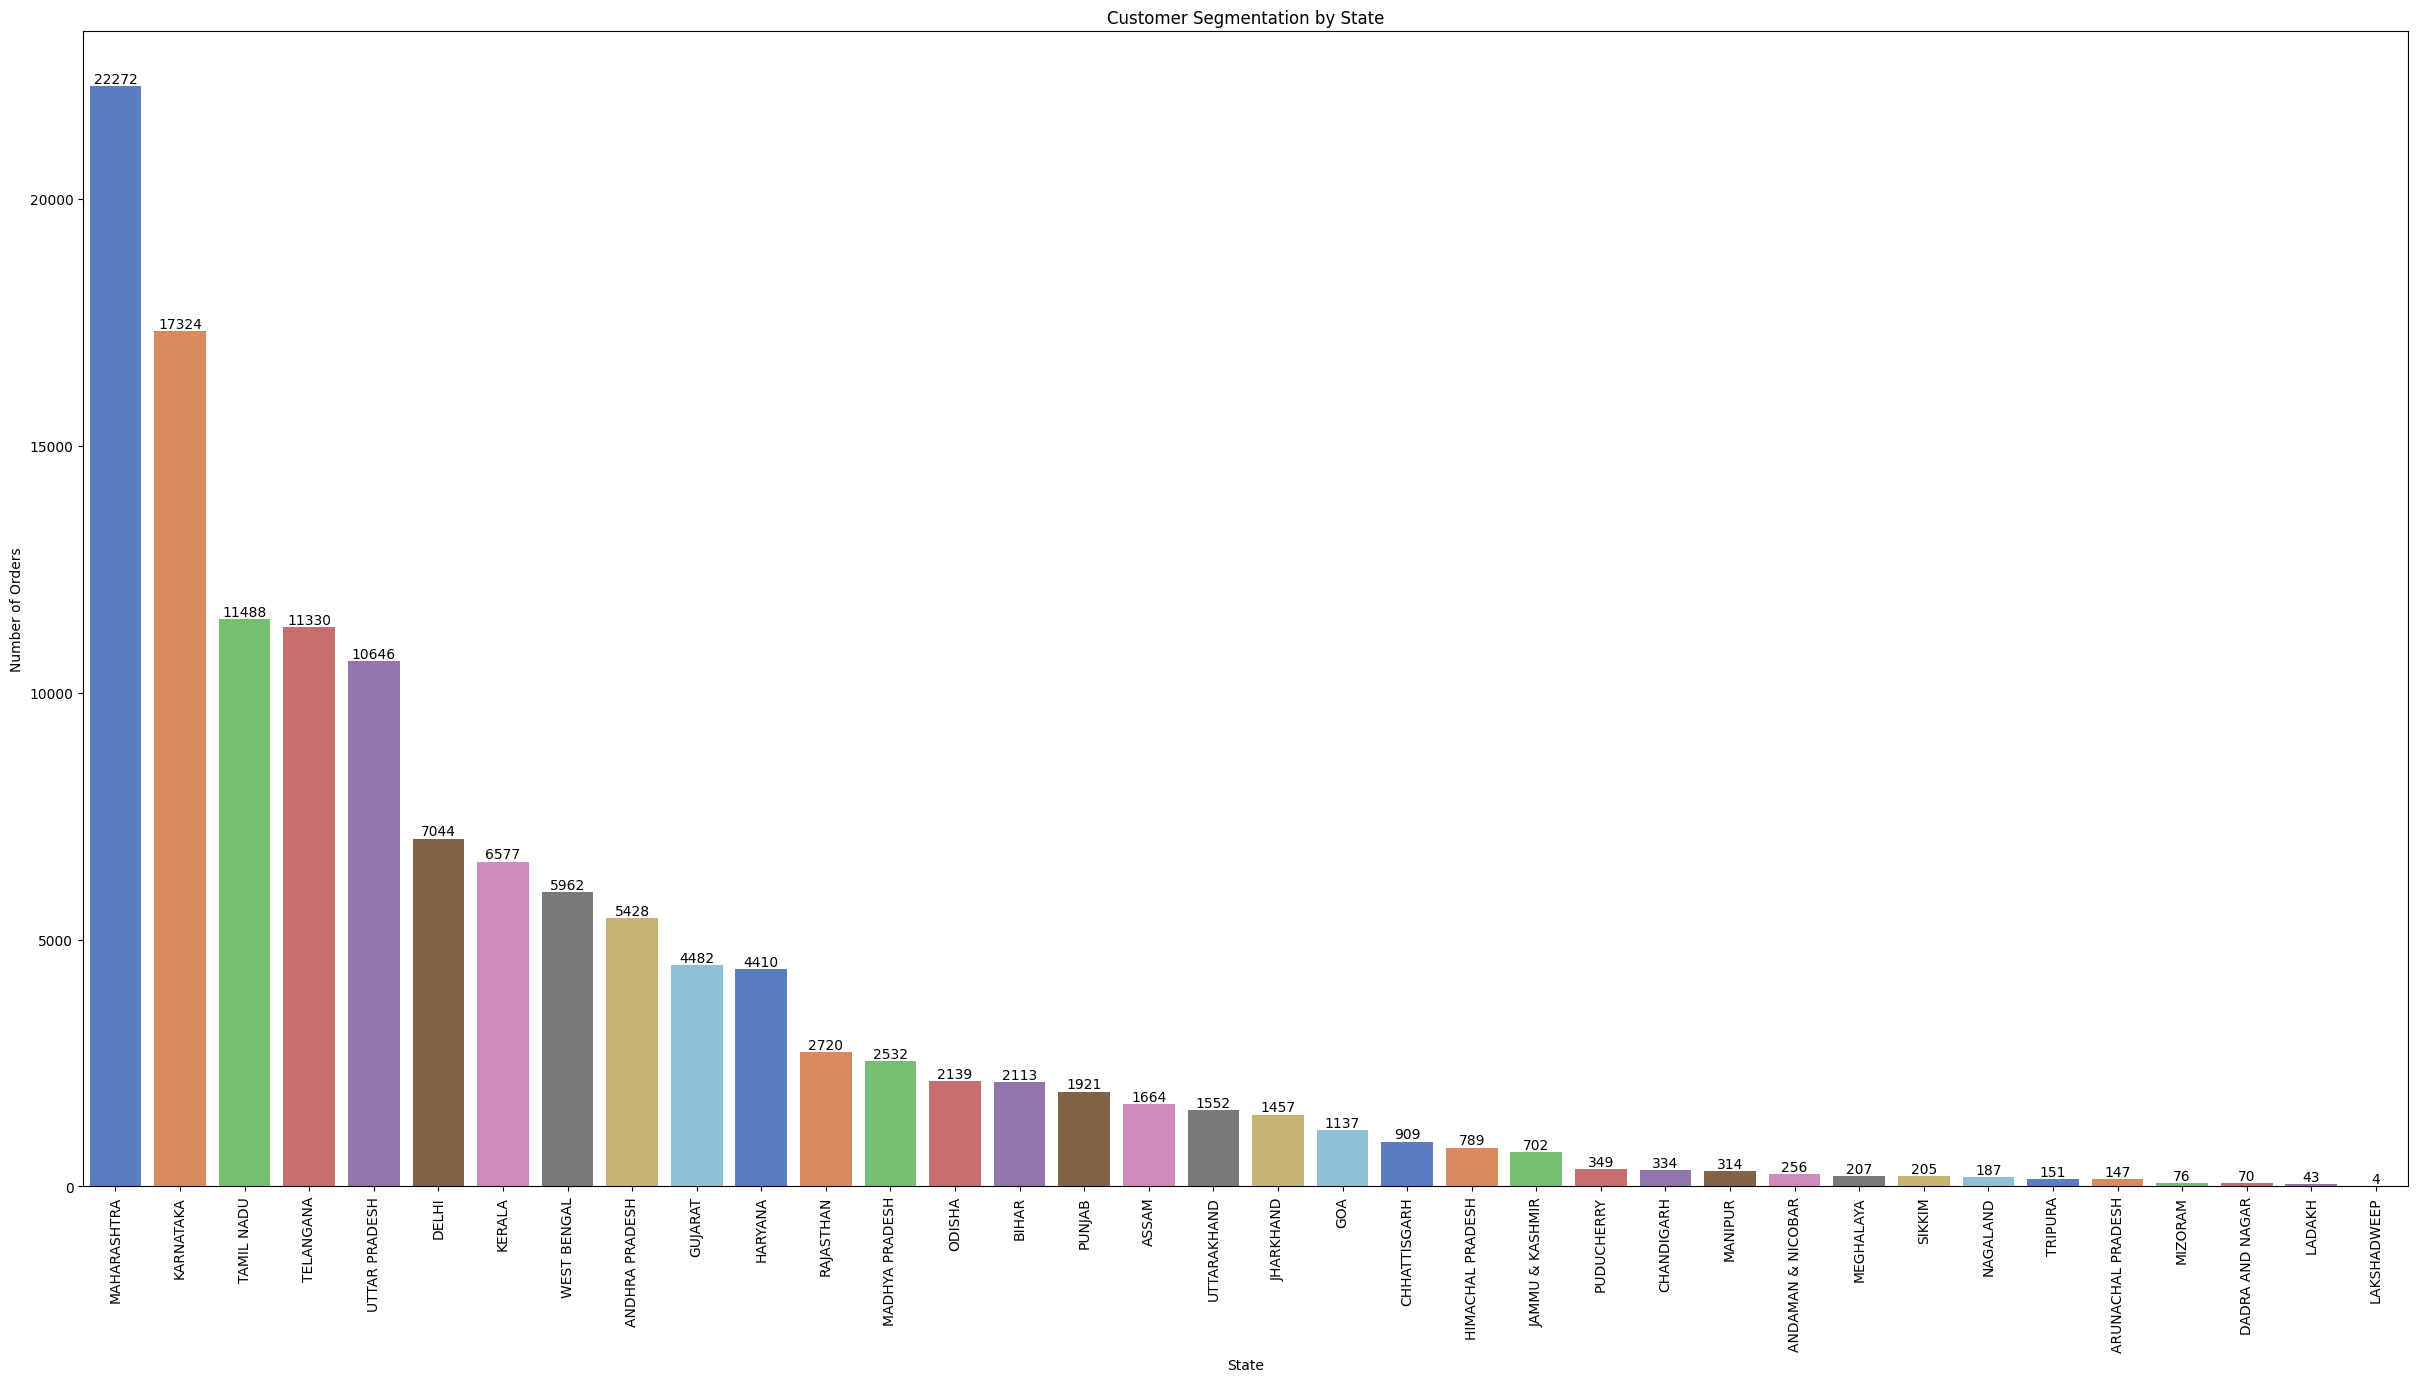

In [26]:
state_segmentation = df['ship-state'].value_counts().reset_index()
state_segmentation.columns = ['State', 'Number of Orders']

custom_palette = sns.color_palette("muted", len(state_segmentation))
plt.figure(figsize=(30,15))
d=sns.barplot(data=state_segmentation, x='State', y='Number of Orders', palette=custom_palette)
for bars in d.containers:
    d.bar_label(bars)
plt.title('Customer Segmentation by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

#

#### Showing the Sum of sales amount from different Sates

In [27]:
state_sales = df.groupby('ship-state').agg({'Amount': 'sum'}).reset_index()
state_sales = state_sales.sort_values('Amount', ascending=False)
state_sales

,ship-state,Amount
20,MAHARASHTRA,13340333.05
15,KARNATAKA,10480694.22
31,TELANGANA,6915018.08
33,UTTAR PRADESH,6823947.08
30,TAMIL NADU,6519182.30
8,DELHI,4390857.41
16,KERALA,3823559.58
35,WEST BENGAL,3507212.82
1,ANDHRA PRADESH,3217859.86
11,HARYANA,2880355.99


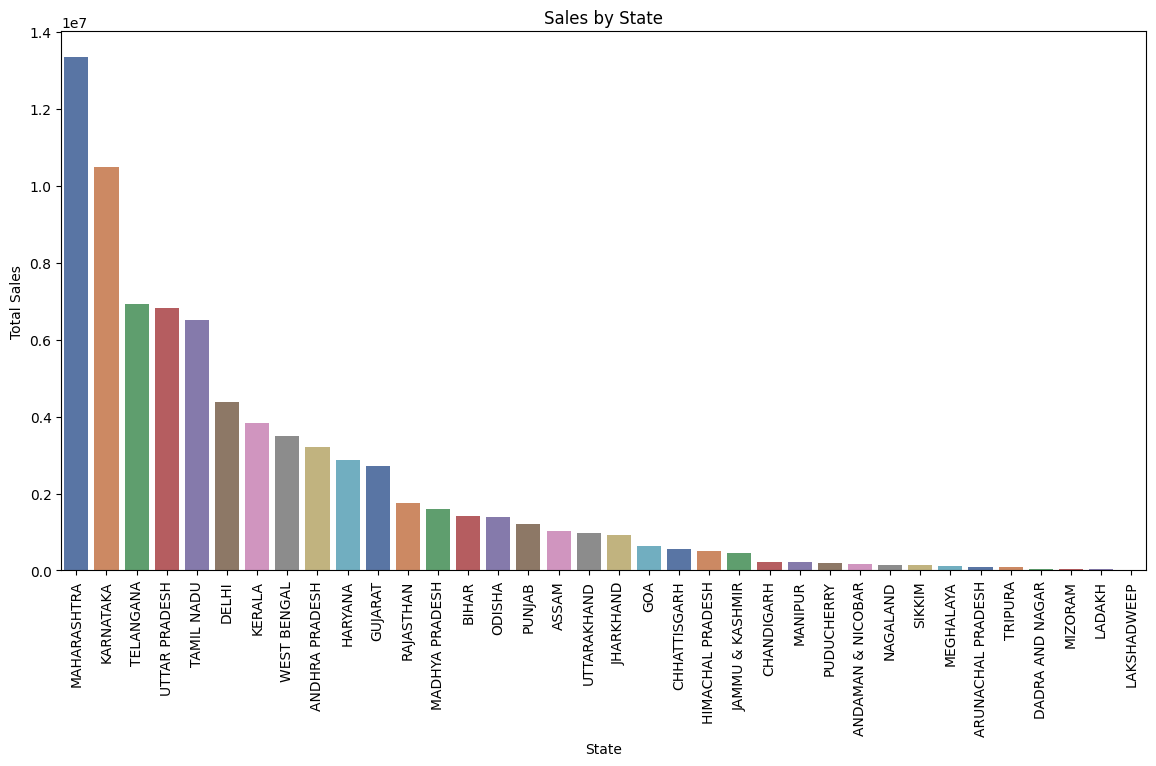

In [28]:
plt.figure(figsize=(14, 7))
d=sns.barplot(data=state_sales, x='ship-state', y='Amount', palette='deep')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

#

#### Showing the Sum of sales amount from different Cities

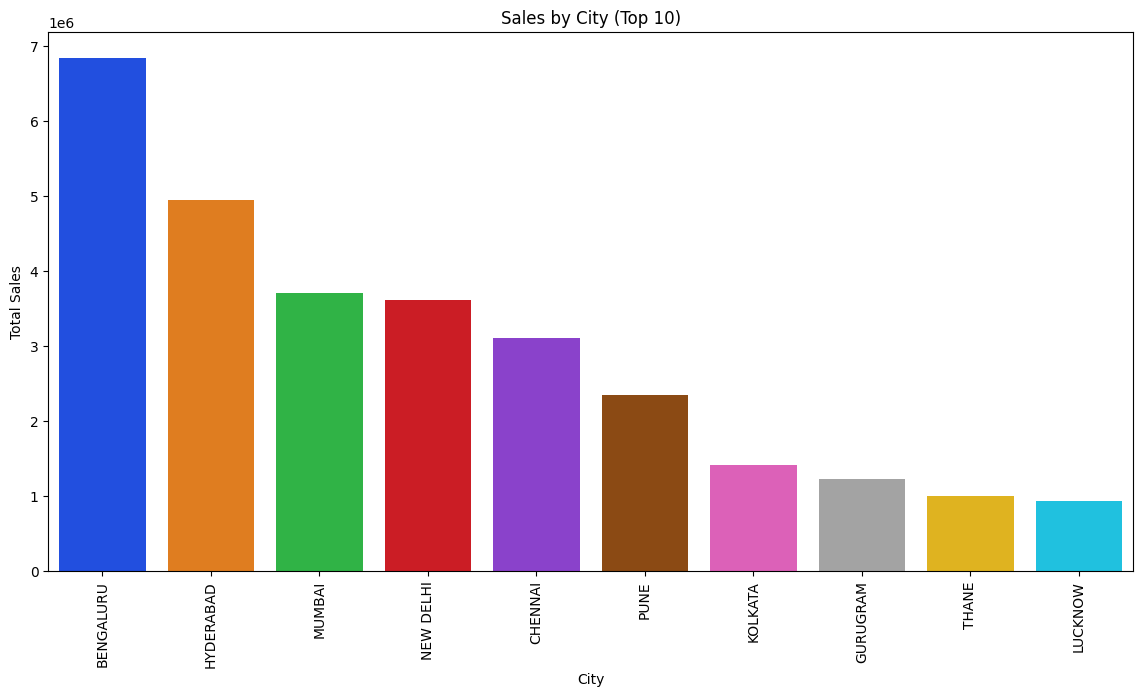

In [29]:
city_sales = df.groupby('ship-city').agg({'Amount': 'sum'}).reset_index()
city_sales = city_sales.sort_values('Amount', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(data=city_sales, x='ship-city', y='Amount', palette='bright')
plt.title('Sales by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()